## Simple example of data loading and visualisation

In this example, we demonstrate some simple examples of how to load data, store it in different data formats and do some simple plotting and interpretation of the data. For this, we will use a real dataset that describes the weather in Oxford, England from 1929 - 2011, with measurements of a number of variables taken at monthy intervals.

First, we need to import some python modules

In [24]:
import os
import numpy as np
import pandas as pd

## First we will get the data. 

There are two options for this.

## Option 1: download the data to your Google drive

You can do this by saving the 'OxfordWeather.txt' file from
[Github](https://github.com/predictive-clinical-neuroscience/BigDataCourse/blob/main/data/)
to your Google drive account. 

In [ ]:
# needed for you to be able to save the necessary data to your google drive
from google.colab import drive
drive.mount('/content/drive')

# change dir to data on your google drive
# change BMS85/data to where you saved mill.mat 
os.chdir('/content/drive/MyDrive/BMS85/') 

## Option 2: get the data directly from GitHub

It is not necessary to understand the details of the wget command for this. Basically it just fetches the data

In [4]:
!wget -nc https://raw.githubusercontent.com/predictive-clinical-neuroscience/BigDataCourse/main/data/OxfordWeather.txt

/bin/bash: wget: command not found


In [9]:
os.getcwd()

'/Users/sietsehornstra/Desktop/GitHub/BigDataCourse/demos'

Now, we will load some real data (describing the weather in oxford) and put it into a pandas dataframe

In [10]:
data = np.loadtxt('../data/OxfordWeather.txt')


This gives us data as a **numpy** array, which you can think of as a matrix with the observations in rows and the variables in columns. We can see this by using the shape :

In [11]:
data.shape

(996, 7)

We can also look at the data

In [13]:
print(data)

[[1.929e+03 1.000e+00 3.700e+00 ... 2.100e+01 2.980e+01 4.380e+01]
 [1.929e+03 2.000e+00 3.300e+00 ... 1.900e+01 1.410e+01 6.050e+01]
 [1.929e+03 3.000e+00 1.290e+01 ... 1.700e+01 1.400e+00 1.902e+02]
 ...
 [2.011e+03 1.000e+01 1.720e+01 ... 0.000e+00 2.630e+01 1.306e+02]
 [2.011e+03 1.100e+01 1.350e+01 ... 1.000e+00 2.840e+01 6.480e+01]
 [2.011e+03 1.200e+01 9.300e+00 ... 4.000e+00 7.120e+01 6.260e+01]]


For things like matrix-vector products a numpy representation is convenient, but as you can see for visualisation (and also for simple data operations) this representation is not optimal. It is often convenient to use a **pandas** 'dataframe' instead, which has a number of nice features, including labels for the rows and columns and permitting different rows to have different data types. Fortunately it is easy to convert the data to this format, which we do in the code block today

In [19]:
df = pd.DataFrame()
df['year'] = data[:,0]
df['month'] = data[:,1]
df['maxTemp'] = data[:,2]
df['minTemp'] = data[:,3]
df['hoursFrost'] = data[:,4]
df['rain'] = data[:,5]
df['hoursSun'] = data[:,6]
df['meanTemp'] = (df['minTemp'] + df['maxTemp']) /2

# display the dataframe
df

,year,month,maxTemp,minTemp,hoursFrost,rain,hoursSun,meanTemp
0,1929.0,1.0,3.7,-1.1,21.0,29.8,43.8,1.30
1,1929.0,2.0,3.3,-3.0,19.0,14.1,60.5,0.15
2,1929.0,3.0,12.9,-0.1,17.0,1.4,190.2,6.40
3,1929.0,4.0,11.8,2.5,6.0,34.3,144.7,7.15
4,1929.0,5.0,17.1,6.4,2.0,28.4,240.9,11.75
...,...,...,...,...,...,...,...,...
991,2011.0,8.0,20.7,11.4,0.0,65.6,157.8,16.05
992,2011.0,9.0,20.7,10.7,0.0,31.8,151.7,15.70
993,2011.0,10.0,17.2,9.5,0.0,26.3,130.6,13.35
994,2011.0,11.0,13.5,6.3,1.0,28.4,64.8,9.90


### Save the pandas dataframe (optional) 
to save ourselves work later on, we could also save this pandas dataframe. Pandas uses a process known as **pickling** for this, resulting in a file in python **pickle** format.   

In [21]:
# save out the
df.to_pickle('OxfordWeather.pkl')

# to load the data, uncomment the following line:
pd.read_pickle('OxfordWeather.pkl')

,year,month,maxTemp,minTemp,hoursFrost,rain,hoursSun,meanTemp
0,1929.0,1.0,3.7,-1.1,21.0,29.8,43.8,1.30
1,1929.0,2.0,3.3,-3.0,19.0,14.1,60.5,0.15
2,1929.0,3.0,12.9,-0.1,17.0,1.4,190.2,6.40
3,1929.0,4.0,11.8,2.5,6.0,34.3,144.7,7.15
4,1929.0,5.0,17.1,6.4,2.0,28.4,240.9,11.75
...,...,...,...,...,...,...,...,...
991,2011.0,8.0,20.7,11.4,0.0,65.6,157.8,16.05
992,2011.0,9.0,20.7,10.7,0.0,31.8,151.7,15.70
993,2011.0,10.0,17.2,9.5,0.0,26.3,130.6,13.35
994,2011.0,11.0,13.5,6.3,1.0,28.4,64.8,9.90


### First look at the data

This datset has 8 variables in it. We will explore some of the relationships between the variables

To do this, we will use a handy function called scatter_matrix

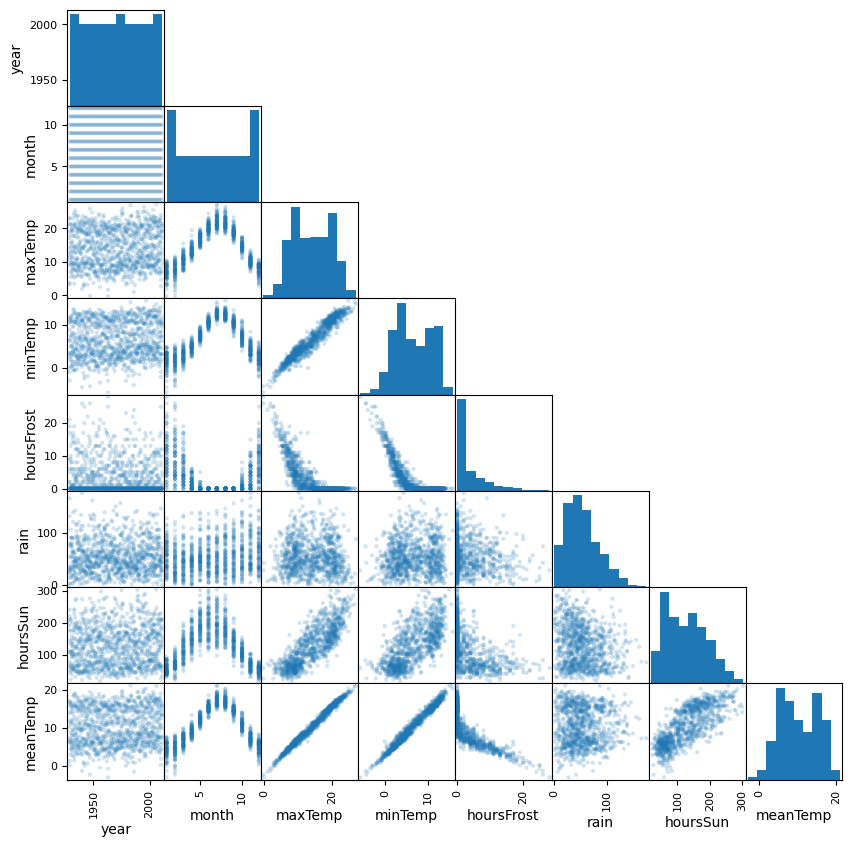

In [26]:
from pandas.plotting import scatter_matrix

axes = scatter_matrix(df, alpha=0.2, figsize=(10, 10))

# It is not important to understand this part of the code.
# This just hides the top diagonal of the scatter matrix
for i in range(np.shape(axes)[0]):
    for j in range(np.shape(axes)[1]):
        if i < j:
            axes[i,j].set_visible(False)

### Interpretation


This allows us to see the relationships between the variables in the dataset quite clearly. For example, looking in the 3rd row and second column, we see that there is a seasonal relationship with temperature. the maximum temperature is highest in months 6-7 (june and july), which makes sense.

You can see that even in this simple example with just 8 variables, there are many interesting relationships. For example, try to answer these questions: 
* Is there a seasonal relationship with rainfall? 
* Do you see evidence for changes in temperature over the years? 
* What is the relationship between the hours of frost and the hours of sunshine? 


### Model fitting (optional)

We might want to follow up this qualitatitve analysis with something a bit more quantitative. We will fit a model for mean temperature as a function of month of the year.

Since we have observed above that the relationship is not linear, we will use a nonlinear regression method for this. More specifically, we will use a polynomial regression model. In this part of the course, we will use be lazy and use existing modules to do the work for us. 

It is not necessary to understand all the details here. Here we will use exisitng packages to help us (i.e. statsmodesl and sklearn). Later in the course we will implement this manually ourselves.

First, we will import some modules...

In [30]:
# stats toolkit
import statsmodels.api as sm 

# We will also use this function to make the polynomial regression work
from sklearn.preprocessing import PolynomialFeatures

Then, we will extract data from the pandas dataframe. we will predict mean temperature ("y") from month ("x", coded as 1,...,12). For this part, it is convenient to convert the data back to numpy format. 

We will also create some polynomial features to make the curve 'bendy'. It is not necessary to understand the details of this at this point.

Finally, we will fit the model using a technique we will learn about later (ordinary least squares)

In [31]:
x = df['month'].to_numpy()
x = x[:, np.newaxis]
y = df['meanTemp'].to_numpy()

# create some polynomial features
polynomial_features = PolynomialFeatures(degree=2)
xp = polynomial_features.fit_transform(x)

# fit the model
model = sm.OLS(y, xp).fit()

Now, we will plot the data. We will use a library called *matplotlib* for this

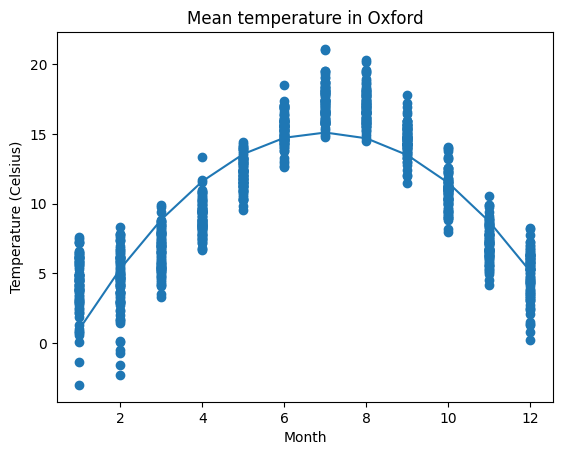

In [32]:
import matplotlib.pyplot as plt 

# First plot the data points
plt.scatter(x,y)

# generate some dummy data
x2 = np.linspace(1,12,12)
x2 = x2[:, np.newaxis]
x2p = polynomial_features.fit_transform(x2)

# make predictions for the dummy data points 
ypred = model.predict(x2p) 

# plot the predictions
plt.plot(x2, ypred)
plt.xlabel('Month')
plt.ylabel('Temperature (Celsius)')
plt.title('Mean temperature in Oxford')
plt.show()